## Toy Model H=X


Measurement Counts: {'000': 54, '010': 439, '100': 52, '110': 455}
Probabilities: {'000': 0.054, '010': 0.439, '100': 0.052, '110': 0.455}


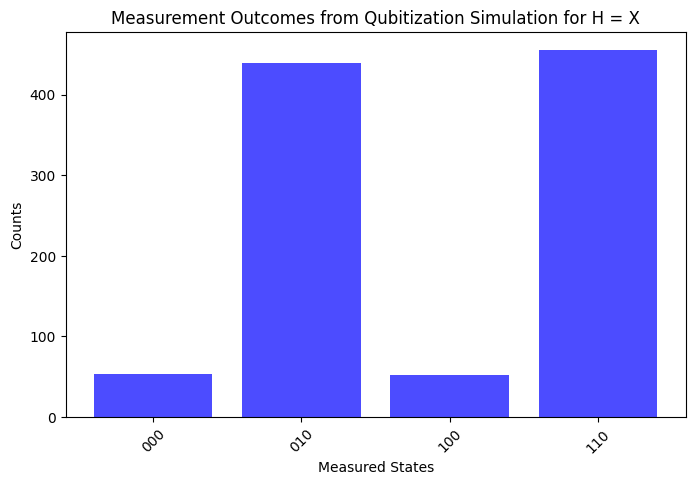

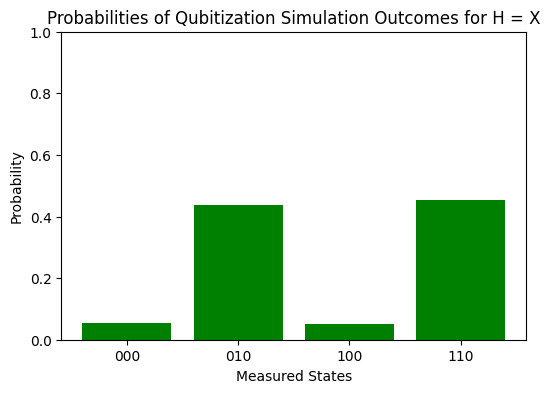

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pytket import Circuit
from pytket.extensions.qiskit import AerBackend
from pytket.passes import FullPeepholeOptimise
from collections import Counter


def prepare_operator(circ, qubits):
    """PREPARE operator for qubitization of H = X."""
    circ.H(qubits[0])  # Hadamard prepares eigenstate of X
    circ.H(qubits[1])  # Apply Hadamard to ancilla for better encoding


def select_operator(circ, qubits):
    """SELECT operator for H = X qubitization."""
    circ.H(qubits[0])  # Move to X eigenbasis
    circ.CX(qubits[0], qubits[1])
    circ.H(qubits[1])
    circ.CX(qubits[1], qubits[2])
    circ.H(qubits[0])  # Move back to computational basis


def qubitization_circuit():
    """Constructs the qubitization circuit for Hamiltonian H = X."""
    circ = Circuit(3, 3)
    q_s, q_a, q_c = 0, 1, 2  # Qubit mappings
    
    # Prepare operator for H = X
    prepare_operator(circ, [q_s, q_a])
    
    # Apply SELECT(H)
    select_operator(circ, [q_s, q_a, q_c])
    
    # Apply reflection about |H>
    circ.H(q_a)
    circ.CX(q_c, q_a)
    circ.Rz(-np.pi / 4, q_a)  # Adjusted phase correction
    circ.H(q_a)
    
    # Apply an additional reflection to ensure proper eigenstate encoding
    circ.H(q_s)
    circ.CX(q_s, q_a)
    circ.Rz(np.pi / 4, q_a)
    circ.H(q_s)
    
    # Measure all qubits
    circ.measure_all()
    
    return circ


# Simulation Parameters
n_shots = 1000
backend = AerBackend()

# Construct and optimize circuit
circ = qubitization_circuit()
FullPeepholeOptimise().apply(circ)

# Execute on Aer simulator
handle = backend.process_circuit(circ, n_shots)
results = backend.get_result(handle)
counts = results.get_counts()

# Convert tuple keys to strings
formatted_counts = {"".join(map(str, key)): value for key, value in counts.items()}

# Extract probabilities
total_shots = sum(formatted_counts.values())
probs = {state: count / total_shots for state, count in formatted_counts.items()}

# Display results
print("Measurement Counts:", formatted_counts)
print("Probabilities:", probs)

# Plot measurement counts
plt.figure(figsize=(8, 5))
plt.bar(formatted_counts.keys(), formatted_counts.values(), color='blue', alpha=0.7)
plt.xlabel("Measured States")
plt.ylabel("Counts")
plt.title("Measurement Outcomes from Qubitization Simulation for H = X")
plt.xticks(rotation=45)
plt.show()

# Plot probabilities
plt.figure(figsize=(6, 4))
plt.bar(probs.keys(), probs.values(), color='green')
plt.xlabel("Measured States")
plt.ylabel("Probability")
plt.title("Probabilities of Qubitization Simulation Outcomes for H = X")
plt.ylim(0, 1)
plt.show()


In [4]:
from pytket.qasm import circuit_to_qasm_str

# Print circuit as QASM
qasm_str = circuit_to_qasm_str(circ)
print("QASM Representation of the Circuit:\n")
print(qasm_str)


QASM Representation of the Circuit:

OPENQASM 2.0;
include "qelib1.inc";

qreg q[3];
creg c[3];
u3(0.0*pi,-0.5*pi,1.0*pi) q[0];
u3(0.5*pi,0.0*pi,1.0*pi) q[1];
u3(0.0*pi,-0.5*pi,2.0*pi) q[2];
cx q[0],q[1];
u3(0.5*pi,0.0*pi,1.0*pi) q[1];
cx q[1],q[2];
measure q[2] -> c[2];
u3(1.2146018366025515*pi,-0.5*pi,1.0*pi) q[1];
cx q[0],q[1];
measure q[1] -> c[1];
u3(0.5*pi,0.0*pi,0.5*pi) q[0];
measure q[0] -> c[0];



In [5]:
# Print the circuit
print(circ)

<tket::Circuit, qubits=3, gates=12>


In [13]:
import numpy as np
from qiskit import QuantumCircuit

def prepare_operator(qc, qubits):
    """PREPARE operator for qubitization of H = X."""
    qc.h(qubits[0])  # Hadamard prepares eigenstate of X
    qc.h(qubits[1])  # Apply Hadamard to ancilla for better encoding


def select_operator(qc, qubits):
    """SELECT operator for H = X qubitization."""
    qc.h(qubits[0])  # Move to X eigenbasis
    qc.cx(qubits[0], qubits[1])
    qc.h(qubits[1])
    qc.cx(qubits[1], qubits[2])
    qc.h(qubits[0])  # Move back to computational basis


def qubitization_circuit():
    """Constructs the qubitization circuit for Hamiltonian H = X."""
    qc = QuantumCircuit(3)
    q_s, q_a, q_c = 0, 1, 2  # Qubit mappings
    
    # Prepare operator for H = X
    prepare_operator(qc, [q_s, q_a])
    
    # Apply SELECT(H)
    select_operator(qc, [q_s, q_a, q_c])
    
    # Apply reflection about |H>
    qc.h(q_a)
    qc.cx(q_c, q_a)
    qc.rz(-np.pi / 4, q_a)  # Adjusted phase correction
    qc.h(q_a)
    
    # Apply an additional reflection to ensure proper eigenstate encoding
    qc.h(q_s)
    qc.cx(q_s, q_a)
    qc.rz(np.pi / 4, q_a)
    qc.h(q_s)
    
    return qc

# Construct and print circuit
qc = qubitization_circuit()
print(qc)

     ┌───┐┌───┐     ┌───┐┌───┐                                   ┌───┐   
q_0: ┤ H ├┤ H ├──■──┤ H ├┤ H ├─────────────────────────────■─────┤ H ├───
     ├───┤└───┘┌─┴─┐├───┤└───┘┌───┐┌───┐┌──────────┐┌───┐┌─┴─┐┌──┴───┴──┐
q_1: ┤ H ├─────┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ Rz(-π/4) ├┤ H ├┤ X ├┤ Rz(π/4) ├
     └───┘     └───┘└───┘┌─┴─┐└───┘└─┬─┘└──────────┘└───┘└───┘└─────────┘
q_2: ────────────────────┤ X ├───────■───────────────────────────────────
                         └───┘                                           


In [7]:
!pip install qiskit-aer
